## Functions
Now, we learn how to write our own functions, but we start out with a bit about Python packages.

### A bit about packages
A package is a set of Python functions. When we want to use a function from a package, we need to import it. There are many different ways to import packages. The most basic syntax is

`import numpy`

after which any function in `numpy` can be called as `numpy.function()`. If you don't like the name of the package, for example because it is long, you can change the name. The `numpy` package is renamed to `np` by typing

`import numpy as np`

after which all functions in `numpy` can be called as `np.function()`. 

Packages can also have subpackages. For example, the `numpy` package has a subpackage called `random`, which has a bunch of functions to deal with random variables. If the `numpy` package is imported with `import numpy as np`, functions in the `random` subpackage can be called as `np.random.function()`. 

If you only need one specific function, you don't have to import the entire package. For example, if you only want the cosine function of the numpy package, you may import it as `from numpy import cos`, after which you can simply call the cosine function as `cos()`. You can even rename functions when you import them. For example, after `from numpy import cos as newname`, you can call the function `newname()` to compute the cosine.

In the previous Notebooks we always imported `numpy` and called it `np` and we imported the `matplotlib.pyplot` and called it `plt`. Both are standard names in the Python community. The statement we added before importing `matplotlib` is `%matplotlib inline`. This latter command is an IPython command and not a Python command. It will only work in IPython and is called a magic command. All magic commands are preceded with a `%`. The statement `%matplotlib inline` puts all figures in the Notebook rather than in a separate window. 

Enough about packages for now. Let's start the way we always start.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Functions
Functions are an essential part of a programming language.
You already used many functions like `plot` or `loadtxt`.
But you can also define your own functions.
To define a new function, use the `def` command. After `def` follows the name of the function and then between parentheses the arguments of the function and finally a colon. After the colon you indent until you are done with the function. The last line of the function should be `return` followed by what you want to return. For example, consider the following function of $x$:

$f(x)= 10 * x - 180$

Let's implement $f(x)$ in a function called `func`. There is one input argument: $x$. 

In [2]:
def func(x):
    f = 10 * x - 180
    return f
print(func(25))

70


Once you define a function in Python, you can call it whenever you want during the session. So we can call it again

In [3]:
print(func(24))

60


The names of the arguments of a function are the names used inside the function. They have no relationship to the names used outside the function. When using a variable as the argument of a function, only the *value* gets passed to the function. In the example below, the *value* of `y` is passed as the first argument ot the function `func`. Inside the function, this value is used for the variable `x`.

In [4]:
y = 2
print('func(2):', func(y))

func(2): -160


### Exercise 5a. <a name="back5a"></a>First function
Write a Python function for the following function:

$f(x)= 3 \cdot a + 4 \cdot b$

The function should take `a` and `b` as input arguments and return the function value. Give your function a unique name (if you also call it `func` it will overwrite the `func` function that we defined above). Make a plot of `f` vs. `a` for `a` going from 0 to 10 using two different constant values of `b`: 2 and 5.

<a href="#ex5aanswer">Answer to Exercise 5a</a>

### Keyword arguments
Functions may have multiple input arguments followed by keyword arguments. Arguments *must* be entered and must be entered in the order defined. Keyword arguments don't need to be entered. When they are not entered, the default value is used. Keyword arguments may be given in any order as long as they come after the regular arguments. If you specify the keyword arguments in the order they are defined in the argument list, you don't even need to preceed them with the keyword, but it is saver to write the keywords out and it makes your code easier to read. For example, the function $f(x)= 25 + 3*k + 9*l + 0.3*m$ can be written with keyword arguments for $l$ and $m$ as follows.

In [7]:
def testfunc(k, l=1, m=0):
    return 25 + 3*k + 9*l + 0.3*m

print(testfunc(1))  # Uses default l=1, m=0
print(testfunc(1, l=2))  # Now l=2, and m is still 0:
print(testfunc(1, l=2, m=4))  # Now l=2, m=4
print(testfunc(1, m=4, l=2))  # Same as above
print(testfunc(1, m=4))  # Now m=4, and l is still 1

37.0
46.0
47.2
47.2
38.2


### Local variables
Variables declared inside a function can only be used inside that function. The outside of a function doesn't know about the variables used inside the function, except for the variables that are returned by the function. In the code below, remove the `#` before `print(a)` and you will get an error message, as `a` is a local variable inside the function `localtest` (then put the `#` back, else you get an error when running [Kernel][Restart & Run All]).

In [8]:
def localtest(x):
    a = 3
    b = 5
    return a * x + b
print(localtest(4))
#print(a)  # Will cause an error, as 'a' is not known outside function 

17


### Three types of variables inside a function
There are actually three types of variables inside a function. We already learned about two of them: variables passed to the function through the argument list, like `x` in the function above, and local variables, like `a` and `b` in the function above. The third type are variables defined outside the function but not passed to the function through the argument list. When a variable is used inside a Python function, Python first checks whether the variable has been defined locally. If not, it checks whether the variable is passed to the function through the argument list. And if that is not the case, Python checks whether the variable is defined outside the function, from the place the function was called. If that is not the case either, it will throw an error message. It is considered good coding practice to pass variables to a function when they are needed inside a function, rather than counting on Python to *find* the variable outside the function; it will likely lead to fewer coding errors as well.

Note that when a variable is defined locally, Python will not check whether that variable is also declared outside the function. It will happily create a new variable with the same name inside the function. It is important to realize the difference between these different types, so let's do a few examples.

In [9]:
# This function works properly
def test1(x):
    a = 3
    b = 5
    return a * x + b
print(test1(4))

# This function also works, but it is sloppy coding
# since variable a is defined outside the function
a = 3
def test2(x):
    b = 5
    return a * x + b
print(test2(4))  

17
17


In the following function, we define variable `var1` outside the function `test3`. The function `test3` doesn't take any input arguments (but it still needs the parentheses, else Python doesn't know it is a function!), and it creates a local variable `var1`. This local `var1` variable is only known inside the function `test3` and doesn't effect the value of `var1` outside function `test3`.

In [10]:
var1 = 8
def test3():
    var1 = 4
    print('Inside the function test3, var1 equals:', var1)
test3()
print('Value of var1 outside test3:', var1)

Inside the function test3, var1 equals: 4
Value of var1 outside test3: 8


### Functions are building blocks that need to be tested separately
Functions are the building blocks of a computer code. They represent a well-defined functionality, which means they can *and should* be tested separately. So make it a habit to test whether your function does what you intended it to do. Sometimes it is easy to test a function: you can compare the value to a hand-calculation, for example. Other times it is more difficult, and you need to write some additional code to test the function. It is always worthwhile to do that. If you test your functions well, it will aid you in debugging your code, because you know that the error is not inside the function.

### Return multiple *things*
An assignment can assign values to multiple variables in one statement, for example

In [11]:
a, b = 4, 3
print('a:', a)
print('b:', b)
a, b, c = np.arange(0, 11, 5)
print('a:', a)
print('b:', b)
print('c:', c)

a: 4
b: 3
a: 0
b: 5
c: 10


Similarly, a function may return one value or one array. Or a function may return multiple values, multiple arrays, or whatever the programmer decides to return (including nothing, of course). When multiple *things* are returned, they are returned as a tuple. They can be stored as a tuple, or, if the user knows how many *things* are returned, they can be stored in individual variables right away, as in the example below.

In [12]:
def newfunc():
    dump = [1, 1, 1, 1]
    dump[0] = 100
    return 33, dump

a, b = newfunc()
print('a:', a)
print('b:', b)

a: 33
b: [100, 1, 1, 1]


### Exercise 5b, Previous exercises

For this exercise no answer will be provided. Include your code segment with an explenatory paragraph to your protocol.

Look through the previous exercises and think about use cases for functions. Select one previous exercise and re-implement it using a function if this yields a benefit.

### Answers to the exercises

<a name="ex5aanswer">Answer to Exercise 5a</a>

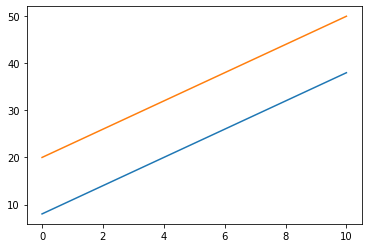

In [14]:
def first_func(a, b):
    return 3 * a + 4 * b
    
a = np.arange(11)

plt.figure()

b=2
plt.plot(first_func(a,b))

b=5
plt.plot(first_func(a,b))

plt.show()

<a href="#back5a">Back to Exercise 5a</a>